In [3]:
import matplotlib.pyplot as plt
from numpy import *
from numpy.linalg import *
from mpl_toolkits.mplot3d import Axes3D

# %matplotlib widget
%matplotlib inline

In [4]:
svec = loadtxt("../Data/3x3-qe/n.cell")
rvec = svec/3
b = 4*pi/(linalg.norm(rvec[0])*sqrt(3))
qvec = b*array([[-sqrt(3)/2,-1/2,0],[0,1,0],[sqrt(3)/2,-1/2,0]])/3
qdif = array([[qvec[0]-qvec[1],qvec[1]-qvec[2],qvec[2]-qvec[0]]])
qdif= qdif[0]
qunit = qvec/abs(linalg.norm(qvec[0]))

In [5]:
rvec

array([[ 3.48549512,  0.        ,  0.        ],
       [-1.74274756,  3.01852732,  0.        ],
       [ 0.        ,  0.        ,  6.13816667]])

In [91]:
n_data = loadtxt("../Data/3x3-qe/n.pos")
m_data = loadtxt("../Data/3x3-qe/p1.pos")

n_atom = dot(n_data,svec)
# n_atom = n_atom-n_atom[0]+(rvec[1])/2-rvec[0]*3/2
# n_atom = n_atom-n_atom[0]-(rvec[1]+rvec[0])/2-rvec[1]-rvec[0]/3
n_atom = n_atom-n_atom[0]-rvec[1]-rvec[1]/3-2*rvec[0]/3

m_atom = dot(m_data,svec)
m_atom = m_atom-m_atom[0]
m_atom += average(n_atom[:9]-m_atom[:9],axis=0)

u = around(m_atom - n_atom,8)

In [92]:
def plot_lattice():
    fig = plt.figure(figsize=(10,10))
    s1, s2 = 200,300
    hw=0.2
    cell_color="black"
    cell_lw=4
    cell_zorder=0
#     plt.scatter(0,0,c="blue",s=s2,label="Nb")
#     plt.scatter(0,0,c="green",s=s1,label="Se")    
    period = arange(-2,3,1)
    for i in period:
        for j in period:
            plt.scatter(n_atom[:9].T[0]+(i*svec[0][0]+j*svec[1][0]),n_atom[:9].T[1]+(i*svec[0][1]+j*svec[1][1]),c="blue",s=s2,zorder=2)
            plt.scatter(n_atom[9:18].T[0]+(i*svec[0][0]+j*svec[1][0]),n_atom[9:18].T[1]+(i*svec[0][1]+j*svec[1][1]),c="green",s=s1,zorder=2)
            
            plt.plot([0,svec[0][0]],[0,svec[0][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([0,svec[1][0]],[0,svec[1][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([svec[0][0],svec[0][0]+svec[1][0]],[svec[0][1],svec[0][1]+svec[1][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([svec[1][0],svec[1][0]+svec[0][0]],[svec[1][1],svec[1][1]+svec[0][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([0,svec[0][0]],[0,svec[0][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([0,svec[1][0]],[0,-svec[1][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([svec[0][0],svec[0][0]+svec[1][0]],[svec[0][1],svec[0][1]-svec[1][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([svec[1][0],svec[1][0]+svec[0][0]],[-svec[1][1],-svec[1][1]+svec[0][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([svec[1][0],-svec[0][0]],[svec[1][1],-svec[0][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([-svec[0][0],svec[1][0]],[svec[0][1],-svec[1][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            for k in [0,2,8]:
                plt.arrow(n_atom[k][0]+(i*svec[0][0]+j*svec[1][0]),n_atom[k][1]+(i*svec[0][1]+j*svec[1][1]),(u[:,0][k])*10,(u[:,1][k])*10,lw=3,zorder=2,color="black",head_width=hw)   
            for k in [3,6,7]:
                plt.arrow(n_atom[k][0]+(i*svec[0][0]+j*svec[1][0]),n_atom[k][1]+(i*svec[0][1]+j*svec[1][1]),(u[:,0][k])*10,(u[:,1][k])*10,lw=3,zorder=2,color="red",head_width=hw)   
            for k in [1,4,5]:
                plt.arrow(n_atom[k][0]+(i*svec[0][0]+j*svec[1][0]),n_atom[k][1]+(i*svec[0][1]+j*svec[1][1]),(u[:,0][k])*10,(u[:,1][k])*10,lw=3,zorder=2,color="orange",head_width=hw)   
    plt.xlim(-12,12)
    plt.ylim(-12,12)
    plt.xticks([])
    plt.yticks([])
#     plt.axis("equal")
#     plt.title("Nb Displacement")
#     plt.legend(loc='upper right', borderpad=1,markerscale=1,labelspacing=1,fontsize=12)
#     plt.savefig("../Plot/3x3_p1_nb.png",bbox_inches='tight')
    # plt.axis("equal")
#     plt.show()

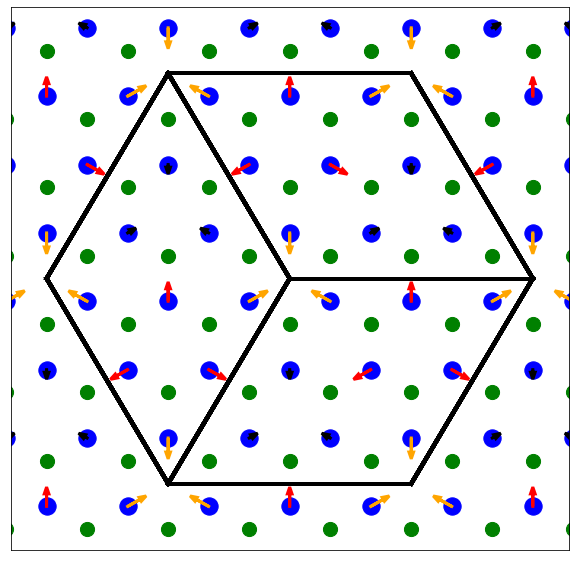

In [93]:
plot_lattice()

In [33]:
def rotate(obj,angle):
    r_matrix = array([[cos(angle),sin(angle),0],[-sin(angle),cos(angle),0],[0,0,0]])
    return (dot(r_matrix,obj).T)

In [94]:
utilde = dot(exp(1j*dot(n_atom[:9],qvec.T)).T,u[:9])

In [95]:
around(utilde,3)

array([[-0.125+0.088j, -0.072+0.051j,  0.   +0.j   ],
       [-0.   -0.j   ,  0.144-0.102j,  0.   +0.j   ],
       [ 0.125-0.088j, -0.072+0.051j,  0.   +0.j   ]])

In [101]:
for i in utilde:
    print(arctan(imag(i[0])/real(i[0]))/pi*180,arctan(imag(i[1])/real(i[1]))/pi*180)

-35.2658811828411 -35.28325204210337
69.07932060133535 -35.27046774802601
-35.283426527452704 -35.28342872981178


In [97]:
for i in real(utilde):
    print(norm(i))

0.14434210316276722
0.14434165639450405
0.14432720344973773


In [98]:
for i in imag(utilde):
    print(norm(i))

0.10208733149710611
0.10208793617180158
0.10212669354282215


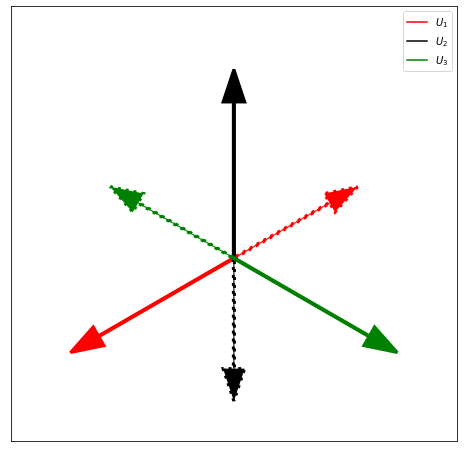

In [96]:
fig = plt.figure(figsize=(8,8))
# for i in qvec:
# #     print(linalg.norm(utilde[i]))
#     plt.arrow(0,0,i[0],i[1],head_width=0.03,color="blue")
#     plt.scatter(i[0]*13/10,i[1]*13/10,s=0.0001)

colors=["red","black","green","red","black","green"]


for i in range(3):
    plt.arrow(0,0,real(utilde)[i][0],real(utilde)[i][1],head_width=0.02,color=colors[i],ls="-",lw=3)
    plt.arrow(0,0,imag(utilde)[i][0],imag(utilde)[i][1],head_width=0.02,color=colors[i],ls=":",lw=3)
    plt.scatter(real(utilde)[i][0]*15/10,real(utilde)[i][1]*15/10,s=0.0001)
    plt.scatter(imag(utilde)[i][0]*15/10,imag(utilde)[i][1]*15/10,s=0.0001)
    plt.plot(0,c=colors[i],label=r"$U_{}$".format(i+1))



# plt.plot(0,c="black",label="Re(CDW)")
# plt.plot(0,c="red",label="Im(CDW)")
# plt.plot(0,c="blue",label="Q-vec")
plt.xticks([])
plt.yticks([])
plt.legend()
plt.axis("equal")    
# plt.savefig("../Plot/3x3_p2_cdw.png",bbox_inches='tight')
plt.show()

In [58]:
for i in utilde:
    print(arctan(imag(i[0])/real(i[0]))/pi*180,arctan(imag(i[1])/real(i[1]))/pi*180)

-85.26600608273218 -85.28360242128846
18.859780116390393 -85.27040542251525
-85.27480459223035 -85.25720689313007


In [60]:
for i in utilde:
    print(arctan(imag(i[0])/real(i[0]))/pi*180,arctan(imag(i[1])/real(i[1]))/pi*180)

85.26600608273218 85.28360242128846
-18.859780116390393 85.27040542251525
85.27480459223035 85.25720689313007


In [57]:
around(utilde,8)

array([[-2.188589e-02+2.6428300e-01j,  1.258993e-02-1.5259954e-01j,
         0.000000e+00+0.0000000e+00j],
       [ 3.974000e-05+1.3570000e-05j, -2.524870e-02+3.0517556e-01j,
         0.000000e+00+0.0000000e+00j],
       [ 2.184615e-02-2.6429658e-01j,  1.265877e-02-1.5257602e-01j,
         0.000000e+00+0.0000000e+00j]])

In [51]:
for i in utilde:
    print(norm(i))

0.3062182573186046
0.30621825731860475
0.30621825731860464


In [ ]:
plot_utilde(utilde)

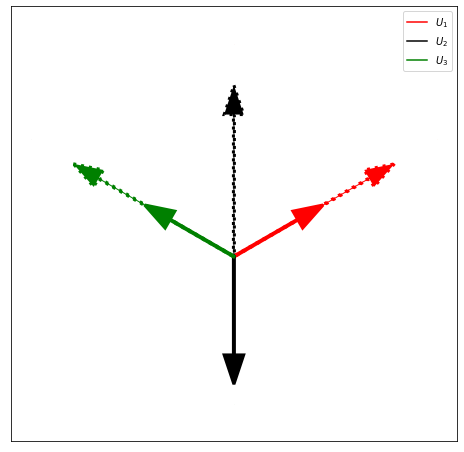

In [101]:
plot_utilde(utilde)

In [69]:
around(sum(utilde,axis=0),3)

array([ 0.087-0.126j, -0.05 +0.073j,  0.   +0.j   ])

In [95]:
around(utilde,3)

array([[-0.065-0.138j, -0.038-0.08j ,  0.   +0.j   ],
       [ 0.   -0.j   ,  0.075+0.16j ,  0.   +0.j   ],
       [-0.087+0.126j,  0.05 -0.073j,  0.   +0.j   ]])

In [100]:
def plot_utilde(tilde):
    fig = plt.figure(figsize=(8,8))
    # for i in qvec:
    # #     print(linalg.norm(utilde[i]))
    #     plt.arrow(0,0,i[0],i[1],head_width=0.03,color="blue")
    #     plt.scatter(i[0]*13/10,i[1]*13/10,s=0.0001)

    colors=["red","black","green","red","black","green"]


    for i in range(3):
        plt.arrow(0,0,real(utilde)[i][0],real(utilde)[i][1],head_width=0.02,color=colors[i],ls="-",lw=3)
        plt.arrow(0,0,imag(utilde)[i][0],imag(utilde)[i][1],head_width=0.02,color=colors[i],ls=":",lw=3)
        plt.scatter(real(utilde)[i][0]*15/10,real(utilde)[i][1]*15/10,s=0.0001)
        plt.scatter(imag(utilde)[i][0]*15/10,imag(utilde)[i][1]*15/10,s=0.0001)
        plt.plot(0,c=colors[i],label=r"$U_{}$".format(i+1))



    # plt.plot(0,c="black",label="Re(CDW)")
    # plt.plot(0,c="red",label="Im(CDW)")
    # plt.plot(0,c="blue",label="Q-vec")
    plt.xticks([])
    plt.yticks([])
    plt.legend()
    plt.axis("equal")    
    # plt.savefig("../Plot/3x3_p2_cdw.png",bbox_inches='tight')
    plt.show()

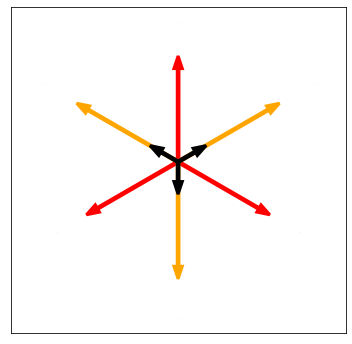

In [41]:
fig = plt.figure(figsize=(6,6))
hw=0.005
plt.scatter(u[:9].T[0]*1.5,u[:9].T[1]*1.5,s=0.001)


for k in [3,6,7]:
    plt.arrow(0,0,u[k][0],u[k][1],lw=3,zorder=2,color="red",head_width=hw)   
for k in [1,4,5]:
    plt.arrow(0,0,u[k][0],u[k][1],lw=3,zorder=2,color="orange",head_width=hw)   
for k in [0,2,8]:
    plt.arrow(0,0,u[k][0],u[k][1],lw=3,zorder=2,color="black",head_width=hw)   
    
# plt.plot(0,0,c="black",label=round(norm(u[0][:2]),3))
# plt.plot(0,0,c="red",label=round(norm(u[3][:2]),3))
# plt.plot(0,0,c="orange",label=round(norm(u[1][:2]),3))
# plt.legend()
plt.xticks([])
plt.yticks([])
plt.axis("equal")
# plt.title("Phase 1")
plt.savefig("../Plot/3x3_p1_nb_mod.png",bbox_inches='tight')
plt.show()


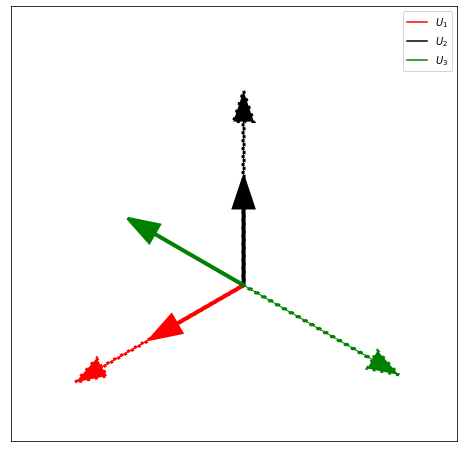

In [94]:
fig = plt.figure(figsize=(8,8))
# for i in qvec:
# #     print(linalg.norm(utilde[i]))
#     plt.arrow(0,0,i[0],i[1],head_width=0.03,color="blue")
#     plt.scatter(i[0]*13/10,i[1]*13/10,s=0.0001)
    
colors=["red","black","green","red","black","green"]
    

for i in range(3):
    plt.arrow(0,0,real(utilde)[i][0],real(utilde)[i][1],head_width=0.02,color=colors[i],ls="-",lw=3)
    plt.arrow(0,0,imag(utilde)[i][0],imag(utilde)[i][1],head_width=0.02,color=colors[i],ls=":",lw=3)
    plt.scatter(real(utilde)[i][0]*15/10,real(utilde)[i][1]*15/10,s=0.0001)
    plt.scatter(imag(utilde)[i][0]*15/10,imag(utilde)[i][1]*15/10,s=0.0001)
    plt.plot(0,c=colors[i],label=r"$U_{}$".format(i+1))
    


# plt.plot(0,c="black",label="Re(CDW)")
# plt.plot(0,c="red",label="Im(CDW)")
# plt.plot(0,c="blue",label="Q-vec")
plt.xticks([])
plt.yticks([])
plt.legend()
plt.axis("equal")    
# plt.savefig("../Plot/3x3_p2_cdw.png",bbox_inches='tight')
plt.show()

In [19]:
sum(qvec*exp(-1j*pi/3),axis=0)

array([0.+0.j, 0.+0.j, 0.+0.j])

In [21]:
around(qvec*exp(-1j*pi/3),3)

array([[-0.3  +0.52j , -0.173+0.3j  ,  0.   +0.j   ],
       [ 0.   +0.j   ,  0.347-0.601j,  0.   +0.j   ],
       [ 0.3  -0.52j , -0.173+0.3j  ,  0.   +0.j   ]])

In [ ]:
qvec[0]

In [10]:
utilde2 = dot(exp(-1j*dot(n_atom[:9],concatenate([[-qvec[0],qvec[1]]]).T)).T,u[:9])

In [1]:
utilde

NameError: name 'utilde' is not defined

In [23]:
around(utilde,3)

array([[ 0.065+0.138j,  0.038+0.08j ,  0.   +0.j   ],
       [ 0.   +0.j   , -0.101+0.145j,  0.   +0.j   ],
       [-0.065-0.138j,  0.038+0.08j ,  0.   +0.j   ]])

In [24]:
around(utilde2,3)

array([[ 0.065+0.138j,  0.038+0.08j ,  0.   +0.j   ],
       [ 0.   -0.j   , -0.101-0.145j,  0.   +0.j   ]])

In [38]:
qvec[0][0]

-0.6008888352694307

In [66]:
around(utilde[0],3)

array([0.065+0.138j, 0.038+0.08j , 0.   +0.j   ])

In [62]:
for i in utilde[0]:
a    print(norm(i))

0.1531059778030515
0.08840263321090883
0.0


In [69]:
around(utilde2,3)

array([[ 0.065+0.138j,  0.038+0.08j ,  0.   +0.j   ],
       [ 0.   -0.j   , -0.101-0.145j,  0.   +0.j   ]])

In [71]:
for i in utilde2:
    print(arctan(imag(i[1])/real(i[1])))

1.129520333366251
0.9646516411544807


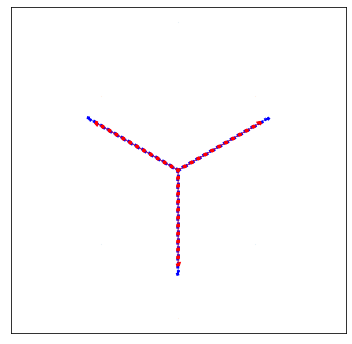

In [77]:
fig = plt.figure(figsize=(6,6))
hw=0.05
plt.scatter(qvec.T[0]/5,qvec.T[1]/3,s=0.001)
plt.scatter(-qvec.T[0]/5,-qvec.T[1]/3,s=0.001)

for i in [utilde2[0]]:
#     plt.arrow(0,0,real(i[0]),real(i[1]),lw=3,color="red")
    plt.arrow(0,0,imag(i[0]),imag(i[1]),lw=3,color="blue",ls=":",zorder=3)
for i in [rotate(utilde2[0].T[:2],2*pi/3)]:
#     plt.arrow(0,0,real(i[0]),real(i[1]),lw=3,color="red")
    plt.arrow(0,0,imag(i[0]),imag(i[1]),lw=3,color="blue",ls=":",zorder=3)
for i in [rotate(utilde2[0].T[:2],4*pi/3)]:
#     plt.arrow(0,0,real(i[0]),real(i[1]),lw=3,color="red")
    plt.arrow(0,0,imag(i[0]),imag(i[1]),lw=3,color="blue",ls=":",zorder=3)
    
for i in [utilde2[1]]:
#     plt.arrow(0,0,real(i[0]),real(i[1]),lw=3,color="red")
    plt.arrow(0,0,imag(i[0]),imag(i[1]),lw=3,color="red",ls=":",zorder=3)
for i in [rotate(utilde2[1].T[:2],2*pi/3)]:
#     plt.arrow(0,0,real(i[0]),real(i[1]),lw=3,color="red")
    plt.arrow(0,0,imag(i[0]),imag(i[1]),lw=3,color="red",ls=":",zorder=3)
for i in [rotate(utilde2[1].T[:2],4*pi/3)]:
#     plt.arrow(0,0,real(i[0]),real(i[1]),lw=3,color="red")
    plt.arrow(0,0,imag(i[0]),imag(i[1]),lw=3,color="red",ls=":",zorder=3)



plt.xticks([])
plt.yticks([])
plt.axis("equal")
plt.show()


In [79]:
dot(n_atom[0],qvec)

array([0., 0., 0.])

In [80]:
u[0]

array([-6.970000e-06, -1.173239e-02,  0.000000e+00])

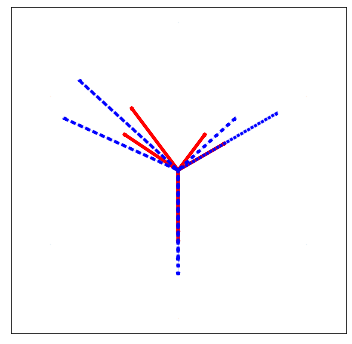

In [29]:
fig = plt.figure(figsize=(6,6))
hw=0.05
plt.scatter(qvec.T[0]*1.5,qvec.T[1]*1.5,s=0.001)
plt.scatter(-qvec.T[0]*1.5,-qvec.T[1]*1.5,s=0.001)

for i in utilde2:
    plt.arrow(0,0,real(i[0])*5,real(i[1])*5,lw=3,color="red")
    plt.arrow(0,0,imag(i[0])*5,imag(i[1])*5,lw=3,color="blue",ls=":",zorder=3)
for i in rotate(utilde2.T[:2],2*pi/3):
    plt.arrow(0,0,real(i[0])*5,real(i[1])*5,lw=3,color="red")
    plt.arrow(0,0,imag(i[0])*5,imag(i[1])*5,lw=3,color="blue",ls=":",zorder=3)
for i in rotate(utilde2.T[:2],4*pi/3):
    plt.arrow(0,0,real(i[0])*5,real(i[1])*5,lw=3,color="red")
    plt.arrow(0,0,imag(i[0])*5,imag(i[1])*5,lw=3,color="blue",ls=":",zorder=3)



plt.xticks([])
plt.yticks([])
plt.axis("equal")
plt.show()


In [ ]:
pl

In [122]:
u1rot = rotate(utilde[1][:2],2*pi/3)

In [125]:
u1rot

array([-0.08723449+0.1258236j ,  0.05034674-0.07266519j])

In [121]:
utilde[1]

array([ 1.56900663e-05+1.80999036e-05j, -1.00720659e-01+1.45299032e-01j,
        0.00000000e+00+0.00000000e+00j])

In [206]:
n_atom.T[:2].T[:9]

array([[ 0.00000000e+00,  0.00000000e+00],
       [-1.74274582e+00,  3.01852430e+00],
       [-3.48549163e+00,  6.03704860e+00],
       [ 3.48549163e+00,  0.00000000e+00],
       [ 1.74274582e+00,  3.01852430e+00],
       [-9.99998750e-10,  6.03704860e+00],
       [ 6.97098327e+00,  0.00000000e+00],
       [ 5.22823745e+00,  3.01852430e+00],
       [ 3.48549163e+00,  6.03704860e+00]])

In [210]:
concatenate([[-qvec[0],qvec[1]]])

array([[ 0.60088884,  0.34692333, -0.        ],
       [ 0.        ,  0.69384666,  0.        ]])

In [211]:
around(dot(n_atom[:9],concatenate([[-qvec[0],qvec[1]]]).T)*3/2/pi,3)

array([[ 0.,  0.],
       [-0.,  1.],
       [-0.,  2.],
       [ 1.,  0.],
       [ 1.,  1.],
       [ 1.,  2.],
       [ 2.,  0.],
       [ 2.,  1.],
       [ 2.,  2.]])

In [184]:
around(utilde,3)

array([[ 0.065+0.138j,  0.038+0.08j ,  0.   +0.j   ],
       [ 0.   +0.j   , -0.101+0.145j,  0.   +0.j   ],
       [-0.065-0.138j,  0.038+0.08j ,  0.   +0.j   ]])

In [185]:
around(utilde,3)[0]*around(utilde,3)[1]

array([ 0.      +0.j     , -0.015438-0.00257j,  0.      +0.j     ])

In [ ]:
dot(exp(1j*dot(n_atom[:9],qvec[0])).T,u[:9])

In [233]:
around(rotate(u[:9].T[:2],2*pi/3).T,3)

array([[-0.01 ,  0.006],
       [ 0.   , -0.062],
       [ 0.01 ,  0.006],
       [-0.   ,  0.055],
       [ 0.054,  0.031],
       [-0.054,  0.031],
       [-0.048, -0.028],
       [ 0.048, -0.028],
       [ 0.   , -0.012]])

In [236]:
around(u[:9],3)

array([[-0.   , -0.012,  0.   ],
       [ 0.054,  0.031,  0.   ],
       [-0.01 ,  0.006,  0.   ],
       [-0.048, -0.028,  0.   ],
       [-0.054,  0.031,  0.   ],
       [-0.   , -0.062,  0.   ],
       [ 0.048, -0.028,  0.   ],
       [ 0.   ,  0.055,  0.   ],
       [ 0.01 ,  0.006,  0.   ]])

In [218]:
around(dot(exp(1j*dot(n_atom[:9],qvec[1])).T,u[:9]),3)

array([ 0.   +0.j   , -0.101+0.145j,  0.   +0.j   ])

In [232]:
around(sum(exp(1j*dot(n_atom[:9],qvec[0]))*rotate(u[:9].T[:2],2*pi/3),3),axis=1),3)

array([ 0.   +0.j  , -0.076-0.16j])

In [240]:
u[:9]

array([[-6.970000e-06, -1.173239e-02,  0.000000e+00],
       [ 5.374398e-02,  3.103111e-02,  0.000000e+00],
       [-1.017101e-02,  5.872230e-03,  0.000000e+00],
       [-4.797336e-02, -2.770749e-02,  0.000000e+00],
       [-5.374747e-02,  3.103111e-02,  0.000000e+00],
       [-1.740000e-06, -6.205920e-02,  0.000000e+00],
       [ 4.799079e-02, -2.770749e-02,  0.000000e+00],
       [ 8.710000e-06,  5.539989e-02,  0.000000e+00],
       [ 1.015707e-02,  5.872230e-03,  0.000000e+00]])

In [261]:
around(sum((exp(1j*dot(n_atom[:9],qvec[0]))*u[:9].T[:2]).T,axis=0),3)

array([0.065+0.138j, 0.038+0.08j ])

In [270]:
around(u,3)[:9]

array([[-0.   , -0.012,  0.   ],
       [ 0.054,  0.031,  0.   ],
       [-0.01 ,  0.006,  0.   ],
       [-0.048, -0.028,  0.   ],
       [-0.054,  0.031,  0.   ],
       [-0.   , -0.062,  0.   ],
       [ 0.048, -0.028,  0.   ],
       [ 0.   ,  0.055,  0.   ],
       [ 0.01 ,  0.006,  0.   ]])

In [115]:
around(sum((exp(1j*dot(n_atom[:9],qvec[0]))*rotate(u[:9].T[:2],0)).T,axis=0),3)

array([-0.065-0.138j, -0.038-0.08j ])

In [116]:
around(sum((exp(1j*dot(n_atom[:9],qvec[0]))*rotate(u[:9].T[:2],pi/3)).T,axis=0),3)

array([-0.065-0.138j,  0.038+0.08j ])

In [117]:
around(sum((exp(1j*dot(n_atom[:9],qvec[0]))*rotate(u[:9].T[:2],2*pi/3)).T,axis=0),3)

array([-0.   +0.j  ,  0.075+0.16j])

In [292]:
norm(around(sum((exp(1j*dot(n_atom[:9],qvec[1]))*rotate(u[:9].T[:2],2*pi/3)).T,axis=0),3))

0.17684456451924102

In [294]:
norm(around(sum((exp(1j*dot(n_atom[:9],qvec[1]))*rotate(u[:9].T[:2],pi/3)).T,axis=0),3))

0.17684456451924102

In [296]:
norm(around(sum((exp(1j*dot(n_atom[:9],qvec[1]))*rotate(u[:9].T[:2],0)).T,axis=0),3))

0.17670880000724357

In [265]:
rotate(qvec.T,2*pi/3)

ValueError: shapes (2,2) and (3,3) not aligned: 2 (dim 1) != 3 (dim 0)

In [258]:
around(utilde,3)

array([[ 0.065+0.138j,  0.038+0.08j ,  0.   +0.j   ],
       [ 0.   +0.j   , -0.101+0.145j,  0.   +0.j   ],
       [-0.065-0.138j,  0.038+0.08j ,  0.   +0.j   ]])

In [238]:
around(dot(exp(1j*dot(n_atom[:9],qvec[0])).T,u[:9]),3)

array([0.065+0.138j, 0.038+0.08j , 0.   +0.j   ])

In [239]:
around(dot(exp(1j*dot(n_atom[:9],qvec[2])).T,u[:9]),3)

array([-0.065-0.138j,  0.038+0.08j ,  0.   +0.j   ])

In [223]:
around(exp(1j*dot(n_atom[:9],qvec[0])),3)

array([ 1. +0.j   ,  1. +0.j   ,  1. +0.j   , -0.5-0.866j, -0.5-0.866j,
       -0.5-0.866j, -0.5+0.866j, -0.5+0.866j, -0.5+0.866j])

In [225]:
rotate(u[:9].T[:2],2*pi/3).T

array([[-1.01570628e-02,  5.87223120e-03],
       [ 1.73956763e-06, -6.20592070e-02],
       [ 1.01710054e-02,  5.87223804e-03],
       [-8.71021510e-06,  5.53998935e-02],
       [ 5.37474646e-02,  3.10311194e-02],
       [-5.37439737e-02,  3.10311069e-02],
       [-4.79907852e-02, -2.77074983e-02],
       [ 4.79733571e-02, -2.77074881e-02],
       [ 6.96535687e-06, -1.17323956e-02]])

In [174]:
around(dot(u[:9],qvec.T)/4,4)

array([[ 0.001 , -0.002 ,  0.001 ],
       [-0.0108,  0.0054,  0.0054],
       [ 0.001 ,  0.001 , -0.002 ],
       [ 0.0096, -0.0048, -0.0048],
       [ 0.0054,  0.0054, -0.0108],
       [ 0.0054, -0.0108,  0.0054],
       [-0.0048, -0.0048,  0.0096],
       [-0.0048,  0.0096, -0.0048],
       [-0.002 ,  0.001 ,  0.001 ]])

In [150]:
exp(1j*8*pi/180)

(0.9902680687415704+0.13917310096006544j)

In [201]:
n_atom

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.74274582e+00,  3.01852430e+00,  0.00000000e+00],
       [-3.48549163e+00,  6.03704860e+00,  0.00000000e+00],
       [ 3.48549163e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.74274582e+00,  3.01852430e+00,  0.00000000e+00],
       [-9.99998750e-10,  6.03704860e+00,  0.00000000e+00],
       [ 6.97098327e+00,  0.00000000e+00,  0.00000000e+00],
       [ 5.22823745e+00,  3.01852430e+00,  0.00000000e+00],
       [ 3.48549163e+00,  6.03704860e+00,  0.00000000e+00],
       [ 5.22843217e-06,  2.01236023e+00, -1.67676634e+00],
       [-1.74274422e+00,  5.03089287e+00, -1.67676278e+00],
       [-3.48549544e+00,  8.04942448e+00, -1.67676634e+00],
       [ 3.48550714e+00,  2.01235849e+00, -1.67676349e+00],
       [ 1.74275467e+00,  5.03089287e+00, -1.67676278e+00],
       [ 5.22690934e-06,  8.04942345e+00, -1.67676278e+00],
       [ 6.97100958e+00,  2.01235849e+00, -1.67676349e+00],
       [ 5.22825836e+00,  5.03089215e+00

In [186]:
around(exp(1j*dot(n_atom[:9],qvec.T)),3).T[:2].T

array([[ 1. +0.j   ,  1. +0.j   ],
       [ 1. +0.j   , -0.5+0.866j],
       [ 1. +0.j   , -0.5-0.866j],
       [-0.5-0.866j,  1. +0.j   ],
       [-0.5-0.866j, -0.5+0.866j],
       [-0.5-0.866j, -0.5-0.866j],
       [-0.5+0.866j,  1. +0.j   ],
       [-0.5+0.866j, -0.5+0.866j],
       [-0.5+0.866j, -0.5-0.866j]])

In [199]:
for i in u.T[:2].T[:9]:
    print(around(norm(i),3))

0.012
0.062
0.012
0.055
0.062
0.062
0.055
0.055
0.012


In [197]:
around(u,2).T[:2].T[:9]

array([[-0.  , -0.01],
       [ 0.05,  0.03],
       [-0.01,  0.01],
       [-0.05, -0.03],
       [-0.05,  0.03],
       [-0.  , -0.06],
       [ 0.05, -0.03],
       [ 0.  ,  0.06],
       [ 0.01,  0.01]])

In [153]:
real(qvec*exp(1j*8*pi/180))

array([[-0.59504103, -0.3435471 ,  0.        ],
       [ 0.        ,  0.68709419,  0.        ],
       [ 0.59504103, -0.3435471 ,  0.        ]])

In [154]:
for i in real(qvec*exp(1j*8*pi/180)):
    print(norm(i))

0.6870941935771918
0.6870941935771918
0.6870941935771918


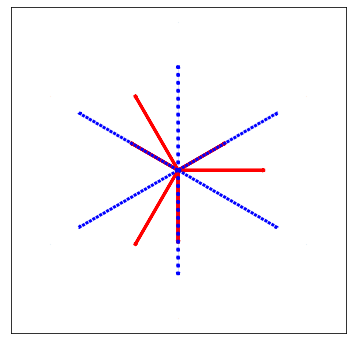

In [160]:
fig = plt.figure(figsize=(6,6))
hw=0.05
# plt.scatter(u[:9].T[0]*1.5,u[:9].T[1]*1.5,s=0.001)

plt.scatter(qvec.T[0]*1.5,qvec.T[1]*1.5,s=0.001)
plt.scatter(-qvec.T[0]*1.5,-qvec.T[1]*1.5,s=0.001)
# for k in qvec:
#     plt.arrow(0,0,k[0],k[1],lw=3,zorder=2,color="black",head_width=hw)   
# for i in qvec*exp(1j*8*pi/180):
#     plt.arrow(0,0,real(i[0]),real(i[1]),lw=3,color="red")
#     plt.arrow(0,0,imag(i[0]),imag(i[1]),lw=3,color="blue",ls=":",zorder=3)


# for i in utilde1:
#     plt.arrow(0,0,real(i[0])*5,real(i[1])*5,lw=3,color="red")
#     plt.arrow(0,0,imag(i[0])*5,imag(i[1])*5,lw=3,color="blue",ls=":",zorder=3)
for i in utilde2:
    plt.arrow(0,0,real(i[0])*5,real(i[1])*5,lw=3,color="red")
    plt.arrow(0,0,imag(i[0])*5,imag(i[1])*5,lw=3,color="blue",ls=":",zorder=3)
    
    
for i in qdif:
    plt.arrow(0,0,real(i[0])/2,real(i[1])/2,lw=3,color="red")
    plt.arrow(0,0,imag(i[0])/2,imag(i[1])/2,lw=3,color="blue",ls=":",zorder=3)
    
# for i in [u1rot]:
#     plt.arrow(0,0,real(i[0])*5,real(i[1])*5,lw=3,color="green")
#     plt.arrow(0,0,imag(i[0])*5,imag(i[1])*5,lw=3,color="green",ls=":",zorder=3)



plt.xticks([])
plt.yticks([])
plt.axis("equal")
plt.show()


In [162]:
qvec

array([[-0.60088884, -0.34692333,  0.        ],
       [ 0.        ,  0.69384666,  0.        ],
       [ 0.60088884, -0.34692333,  0.        ]])

In [143]:
for i in qvec:
    print(norm(i))

0.6938466615916931
0.6938466615916931
0.6938466615916931


In [ ]:
for i in utilde:
    print(arctan(real(i[])))

In [9]:
qdif

array([[-0.60088884, -1.04076999,  0.        ],
       [-0.60088884,  1.04076999,  0.        ],
       [ 1.20177767,  0.        ,  0.        ]])

In [161]:
for i in qdif:
    print(norm(i))

1.2017776705388614
1.2017776705388614
1.2017776705388614


In [10]:
arctan(-0.145/( -0.101))/pi*180

55.14079314611279

In [11]:
arctan(-0.138/(0.065))/pi*180

-64.77888480630861

In [12]:
for i in utilde:
    print(norm(i))

0.17679498295384677
0.17679496735633315
0.17680555191964842


In [13]:
for i in real(utilde):
    print(norm(i))

0.0754716536117258
0.1007206606712901
0.07551300380096582


In [14]:
for i in imag(utilde):
    print(norm(i))

0.15987650077094712
0.14529903301972022
0.15986866311621803


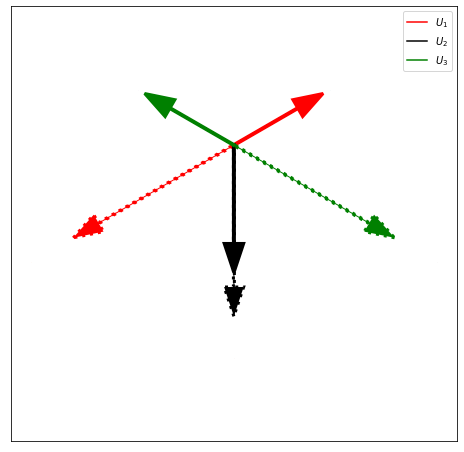

In [15]:
fig = plt.figure(figsize=(8,8))
# for i in qvec:
# #     print(linalg.norm(utilde[i]))
#     plt.arrow(0,0,i[0],i[1],head_width=0.03,color="blue")
#     plt.scatter(i[0]*13/10,i[1]*13/10,s=0.0001)
    
colors=["red","black","green"]
    

for i in range(3):
    plt.arrow(0,0,real(utilde)[i][0],real(utilde)[i][1],head_width=0.02,color=colors[i],ls="-",lw=3)
    plt.arrow(0,0,imag(utilde)[i][0],imag(utilde)[i][1],head_width=0.02,color=colors[i],ls=":",lw=3)
    plt.scatter(real(utilde)[i][0]*15/10,real(utilde)[i][1]*15/10,s=0.0001)
    plt.scatter(imag(utilde)[i][0]*15/10,imag(utilde)[i][1]*15/10,s=0.0001)
    plt.plot(0,c=colors[i],label=r"$U_{}$".format(i+1))    
    
# for i in range(3):
#     plt.arrow(0,0,real( qvec*exp(-1j*60/180*pi))[i][0],real( qvec*exp(-1j*60/180*pi))[i][1],head_width=0.02,color=colors[i],ls="-",lw=3)
#     plt.arrow(0,0,imag( qvec*exp(-1j*60/180*pi))[i][0],imag( qvec*exp(-1j*60/180*pi))[i][1],head_width=0.02,color=colors[i],ls=":",lw=3)
#     plt.scatter(real( qvec*exp(-1j*60/180*pi))[i][0]*15/10,real( qvec*exp(-1j*60/180*pi))[i][1]*15/10,s=0.0001)
#     plt.scatter(imag( qvec*exp(-1j*60/180*pi))[i][0]*15/10,imag( qvec*exp(-1j*60/180*pi))[i][1]*15/10,s=0.0001)
#     plt.plot(0,c=colors[i],label=r"$Q_{}$".format(i+1))    
    
# plt.plot(0,c="black",label="Re(CDW)")
# plt.plot(0,c="red",label="Im(CDW)")
# plt.plot(0,c="blue",label="Q-vec")
plt.xticks([])
plt.yticks([])
plt.legend()

plt.axis("equal")    
# plt.title("Phase 1")
# plt.savefig("../Plot/3x3_p1_cdw.png",bbox_inches='tight')
plt.show()

In [52]:
utilde = dot(around(exp(-1j*dot(around(n_atom[:9],3),around(qvec,3).T).T),3),around(u[:9],3))

In [57]:
utilde = dot(around(exp(-1j*dot(around(n_atom[:9],3),around(-qvec[2],3).T).T),3),around(u[:9],3))

In [56]:
around(utilde,3)

array([[ 0.066-0.139j,  0.038-0.08j ,  0.   +0.j   ],
       [ 0.   -0.j   , -0.102-0.145j,  0.   +0.j   ],
       [-0.066+0.139j,  0.038-0.08j ,  0.   +0.j   ]])

In [55]:
-around(utilde,3)[1]-around(utilde,3)[2]

array([ 0.066-0.139j,  0.064+0.225j, -0.   -0.j   ])

In [17]:
around(dot(around(n_atom[:9],3),around(qvec,3).T)*3/2/pi,3)

array([[ 0.,  0.,  0.],
       [-0.,  1., -1.],
       [-0.,  2., -2.],
       [-1.,  0.,  1.],
       [-1.,  1., -0.],
       [-1.,  2., -1.],
       [-2.,  0.,  2.],
       [-2.,  1.,  1.],
       [-2.,  2., -0.]])

In [25]:
n_atom[:9].T[:2].T

array([[ 0.00000000e+00,  0.00000000e+00],
       [-1.74274582e+00,  3.01852430e+00],
       [-3.48549163e+00,  6.03704860e+00],
       [ 3.48549163e+00,  0.00000000e+00],
       [ 1.74274582e+00,  3.01852430e+00],
       [-9.99998750e-10,  6.03704860e+00],
       [ 6.97098327e+00,  0.00000000e+00],
       [ 5.22823745e+00,  3.01852430e+00],
       [ 3.48549163e+00,  6.03704860e+00]])

In [42]:
sum(around(dot(qvec,n_atom[:9].T).T*3/2/pi,3),axis=0)

array([-9.,  9.,  0.])

In [31]:
qvec[0]-qvec[1]

array([-0.60088884, -1.04076999,  0.        ])

In [43]:
sum(exp(-1j*dot(n_atom[:9],(qvec[0]-qvec[1]).T)))

(-6.5795702219872965e-12-1.1397105481592007e-11j)

In [51]:
around(qvec,3)

array([[-0.601, -0.347,  0.   ],
       [ 0.   ,  0.694,  0.   ],
       [ 0.601, -0.347,  0.   ]])

In [49]:
around(exp(-1j*dot(n_atom[:9],(qvec[0]).T)),3)

array([ 1. -0.j   ,  1. -0.j   ,  1. -0.j   , -0.5+0.866j, -0.5+0.866j,
       -0.5+0.866j, -0.5-0.866j, -0.5-0.866j, -0.5-0.866j])

In [48]:
around(exp(-1j*dot(n_atom[:9],(qvec[2]).T)),3)

array([ 1. -0.j   , -0.5+0.866j, -0.5-0.866j, -0.5-0.866j,  1. +0.j   ,
       -0.5+0.866j, -0.5+0.866j, -0.5-0.866j,  1. +0.j   ])

In [45]:
sum(exp(-1j*dot(n_atom[:9],(qvec[2]).T)))

(1.315769715404258e-11-4.440892098500626e-16j)

In [40]:
sum(dot(n_atom[:9],(qvec[0])))/pi

-5.9999939993175255

In [19]:
around(dot(n_atom[:9],qvec[0])*3/2/pi,3)

array([ 0.,  0.,  0., -1., -1., -1., -2., -2., -2.])

In [20]:
around(dot(n_atom[:9],qvec[1])*3/2/pi,3)

array([0., 1., 2., 0., 1., 2., 0., 1., 2.])

In [21]:
around(dot(n_atom[:9],qvec[2])*3/2/pi,3)

array([ 0., -1., -2.,  1., -0., -1.,  2.,  1., -0.])

In [22]:
qvec

array([[-0.60088884, -0.34692333,  0.        ],
       [ 0.        ,  0.69384666,  0.        ],
       [ 0.60088884, -0.34692333,  0.        ]])

In [108]:
def rotate(obj,angle):
    r_matrix = array([[cos(angle),sin(angle)],[-sin(angle),cos(angle)]])
    return (dot(r_matrix,obj))

In [149]:
utilde = around(dot(around(exp(1j*dot(around(n_atom[:9],3),around(concatenate([qvec,-qvec]),3).T).T),3),around(u[:9],3)),3)

In [150]:
rotate(utilde.T[:2],2*pi/3).T

array([[-9.10346562e-05-0.00021797j, -7.61576766e-02-0.16037753j],
       [-8.83345912e-02+0.12557368j,  5.10000000e-02-0.0725j    ],
       [ 6.59089653e-02+0.13878203j,  3.81576766e-02+0.08037753j],
       [-9.10346562e-05+0.00021797j, -7.61576766e-02+0.16037753j],
       [-8.83345912e-02-0.12557368j,  5.10000000e-02+0.0725j    ],
       [ 6.59089653e-02-0.13878203j,  3.81576766e-02-0.08037753j]])

In [151]:
abs(utilde)

array([[0.15387332, 0.08856636, 0.        ],
       [0.        , 0.17728226, 0.        ],
       [0.15387332, 0.08856636, 0.        ],
       [0.15387332, 0.08856636, 0.        ],
       [0.        , 0.17728226, 0.        ],
       [0.15387332, 0.08856636, 0.        ]])

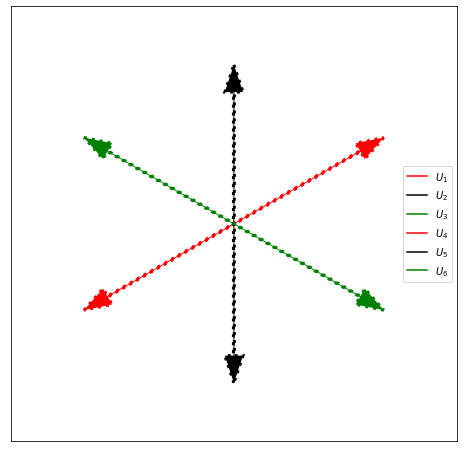

In [152]:
fig = plt.figure(figsize=(8,8))
# for i in qvec:
# #     print(linalg.norm(utilde[i]))
#     plt.arrow(0,0,i[0],i[1],head_width=0.03,color="blue")
#     plt.scatter(i[0]*13/10,i[1]*13/10,s=0.0001)
    
colors=["red","black","green","red","black","green"]
    

for i in range(6):
#     plt.arrow(0,0,real(utilde)[i][0],real(utilde)[i][1],head_width=0.02,color=colors[i],ls="-",lw=3)
    plt.arrow(0,0,imag(utilde)[i][0],imag(utilde)[i][1],head_width=0.02,color=colors[i],ls=":",lw=3)
#     plt.scatter(real(utilde)[i][0]*15/10,real(utilde)[i][1]*15/10,s=0.0001)
    plt.scatter(imag(utilde)[i][0]*15/10,imag(utilde)[i][1]*15/10,s=0.0001)
    plt.plot(0,c=colors[i],label=r"$U_{}$".format(i+1))    
    
# for i in range(3):
#     plt.arrow(0,0,real( qvec*exp(-1j*60/180*pi))[i][0],real( qvec*exp(-1j*60/180*pi))[i][1],head_width=0.02,color=colors[i],ls="-",lw=3)
#     plt.arrow(0,0,imag( qvec*exp(-1j*60/180*pi))[i][0],imag( qvec*exp(-1j*60/180*pi))[i][1],head_width=0.02,color=colors[i],ls=":",lw=3)
#     plt.scatter(real( qvec*exp(-1j*60/180*pi))[i][0]*15/10,real( qvec*exp(-1j*60/180*pi))[i][1]*15/10,s=0.0001)
#     plt.scatter(imag( qvec*exp(-1j*60/180*pi))[i][0]*15/10,imag( qvec*exp(-1j*60/180*pi))[i][1]*15/10,s=0.0001)
#     plt.plot(0,c=colors[i],label=r"$Q_{}$".format(i+1))    
    
# plt.plot(0,c="black",label="Re(CDW)")
# plt.plot(0,c="red",label="Im(CDW)")
# plt.plot(0,c="blue",label="Q-vec")
plt.xticks([])
plt.yticks([])
plt.legend()

plt.axis("equal")    
# plt.title("Phase 1")
# plt.savefig("../Plot/3x3_p1_cdw.png",bbox_inches='tight')
plt.show()

In [153]:
utilde

array([[ 0.066+0.139j,  0.038+0.08j ,  0.   +0.j   ],
       [ 0.   +0.j   , -0.102+0.145j,  0.   +0.j   ],
       [-0.066-0.139j,  0.038+0.08j ,  0.   +0.j   ],
       [ 0.066-0.139j,  0.038-0.08j ,  0.   +0.j   ],
       [ 0.   -0.j   , -0.102-0.145j,  0.   +0.j   ],
       [-0.066+0.139j,  0.038-0.08j ,  0.   +0.j   ]])

In [154]:
arctan(0.145/ 0.102)/pi*180

54.87559607326643

In [160]:
around(dot(n_atom[:9] ,qvec.T)/2/pi*3,3)

array([[ 0.,  0.,  0.],
       [ 0.,  1., -1.],
       [ 0.,  2., -2.],
       [-1.,  0.,  1.],
       [-1.,  1., -0.],
       [-1.,  2., -1.],
       [-2.,  0.,  2.],
       [-2.,  1.,  1.],
       [-2.,  2., -0.]])

In [144]:
60-54.87559607326643

5.124403926733571

In [143]:
64.59228189105154-60

4.592281891051542

In [142]:
arctan(-0.08/0.038)/pi*180

-64.59228189105154

In [148]:
around(64.592+54.876,3)

119.468

In [135]:
for i in utilde:
    print(norm(imag(i[:2])))

0.15983272876354201
0.144622
0.15983272876354201
0.15983272876354201
0.144622
0.15983272876354201


In [136]:
utilde

array([[ 6.61020000e-02-1.38560000e-01j,  3.79960000e-02-7.96720000e-02j,
         0.00000000e+00+0.00000000e+00j],
       [ 8.22279744e-18-9.29950561e-19j, -1.01667000e-01-1.44622000e-01j,
         0.00000000e+00+0.00000000e+00j],
       [-6.60060000e-02+1.38560000e-01j,  3.79410000e-02-7.96720000e-02j,
         0.00000000e+00+0.00000000e+00j],
       [ 6.61020000e-02+1.38560000e-01j,  3.79960000e-02+7.96720000e-02j,
         0.00000000e+00+0.00000000e+00j],
       [ 8.22279744e-18+9.29950561e-19j, -1.01667000e-01+1.44622000e-01j,
         0.00000000e+00+0.00000000e+00j],
       [-6.60060000e-02-1.38560000e-01j,  3.79410000e-02+7.96720000e-02j,
         0.00000000e+00+0.00000000e+00j]])

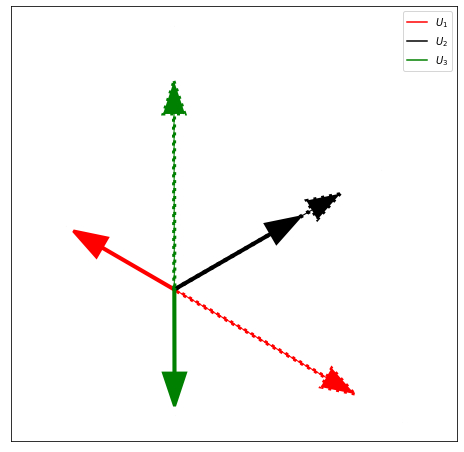

In [117]:
fig = plt.figure(figsize=(8,8))
# for i in qvec:
# #     print(linalg.norm(utilde[i]))
#     plt.arrow(0,0,i[0],i[1],head_width=0.03,color="blue")
#     plt.scatter(i[0]*13/10,i[1]*13/10,s=0.0001)
    
colors=["red","black","green"]
    

for i in range(3):
    plt.arrow(0,0,real(rotate(utilde.T[:2],4*pi/3).T)[i][0],real(rotate(utilde.T[:2],4*pi/3).T)[i][1],head_width=0.02,color=colors[i],ls="-",lw=3)
    plt.arrow(0,0,imag(rotate(utilde.T[:2],4*pi/3).T)[i][0],imag(rotate(utilde.T[:2],4*pi/3).T)[i][1],head_width=0.02,color=colors[i],ls=":",lw=3)
    plt.scatter(real(rotate(utilde.T[:2],4*pi/3).T)[i][0]*15/10,real(rotate(utilde.T[:2],4*pi/3).T)[i][1]*15/10,s=0.0001)
    plt.scatter(imag(rotate(utilde.T[:2],4*pi/3).T)[i][0]*15/10,imag(rotate(utilde.T[:2],4*pi/3).T)[i][1]*15/10,s=0.0001)
    plt.plot(0,c=colors[i],label=r"$U_{}$".format(i+1))    
    
    
# plt.plot(0,c="black",label="Re(CDW)")
# plt.plot(0,c="red",label="Im(CDW)")
# plt.plot(0,c="blue",label="Q-vec")
plt.xticks([])
plt.yticks([])
plt.legend()

plt.axis("equal")    
# plt.title("Phase 1")
# plt.savefig("../Plot/3x3_p1_cdw.png",bbox_inches='tight')
plt.show()

In [ ]:
util

In [ ]:
aa

In [100]:
real(utilde*exp(-1j*54.89*pi/180))

array([[-7.53304820e-02, -4.33223028e-02,  0.00000000e+00],
       [ 3.96858036e-18, -1.76781508e-01,  0.00000000e+00],
       [ 7.53856963e-02, -4.33539359e-02,  0.00000000e+00]])

In [101]:
imag(utilde*exp(-1j*54.89*pi/180))

array([[-1.33767210e-01, -7.69057974e-02,  0.00000000e+00],
       [-7.26151332e-18, -1.04364333e-05,  0.00000000e+00],
       [ 1.33688677e-01, -7.68608047e-02,  0.00000000e+00]])

In [96]:
arctan(-1.44622000e-01/-1.01667000e-01)/pi*180

54.89338250073346

In [103]:
real(utilde)

array([[ 6.61020000e-02,  3.79960000e-02,  0.00000000e+00],
       [ 8.22279744e-18, -1.01667000e-01,  0.00000000e+00],
       [-6.60060000e-02,  3.79410000e-02,  0.00000000e+00]])

In [104]:
qvec

array([[-0.60088884, -0.34692333,  0.        ],
       [ 0.        ,  0.69384666,  0.        ],
       [ 0.60088884, -0.34692333,  0.        ]])

In [105]:
imag(utilde)

array([[-1.38560000e-01, -7.96720000e-02,  0.00000000e+00],
       [-9.29950561e-19, -1.44622000e-01,  0.00000000e+00],
       [ 1.38560000e-01, -7.96720000e-02,  0.00000000e+00]])

In [91]:
utilde

array([[ 6.61020000e-02-1.38560000e-01j,  3.79960000e-02-7.96720000e-02j,
         0.00000000e+00+0.00000000e+00j],
       [ 8.22279744e-18-9.29950561e-19j, -1.01667000e-01-1.44622000e-01j,
         0.00000000e+00+0.00000000e+00j],
       [-6.60060000e-02+1.38560000e-01j,  3.79410000e-02-7.96720000e-02j,
         0.00000000e+00+0.00000000e+00j]])

In [63]:
around(u[:9],3)

array([[-0.   , -0.012,  0.   ],
       [ 0.054,  0.031,  0.   ],
       [-0.01 ,  0.006,  0.   ],
       [-0.048, -0.028,  0.   ],
       [-0.054,  0.031,  0.   ],
       [-0.   , -0.062,  0.   ],
       [ 0.048, -0.028,  0.   ],
       [ 0.   ,  0.055,  0.   ],
       [ 0.01 ,  0.006,  0.   ]])

In [64]:
around(n_atom[:9],3)

array([[ 0.   ,  0.   ,  0.   ],
       [-1.743,  3.019,  0.   ],
       [-3.485,  6.037,  0.   ],
       [ 3.485,  0.   ,  0.   ],
       [ 1.743,  3.019,  0.   ],
       [-0.   ,  6.037,  0.   ],
       [ 6.971,  0.   ,  0.   ],
       [ 5.228,  3.019,  0.   ],
       [ 3.485,  6.037,  0.   ]])

In [66]:
around(qvec,3)

array([[-0.601, -0.347,  0.   ],
       [ 0.   ,  0.694,  0.   ],
       [ 0.601, -0.347,  0.   ]])

In [62]:
for i in qvec*exp(-1j*68/180*pi)-qvec*exp(-1j*8/180*pi):
    print(norm(i))

0.693846661591693
0.693846661591693
0.693846661591693


In [59]:
for i in utilde:
    print(norm(real(i)))

0.0754716536117258
0.1007206606712901
0.07551300380096582


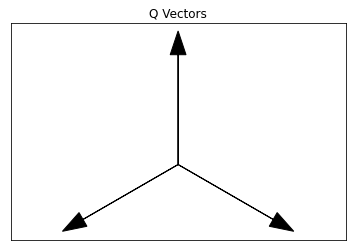

In [38]:
plt.scatter(qvec.T[0]*1.2,qvec.T[1]*1.2,s=0.0001)
for i in qvec:
    plt.arrow(0,0,i[0],i[1],head_width=0.1,color="black")
plt.xticks([])
plt.yticks([])
plt.axis("equal")
plt.title("Q Vectors")
plt.savefig("../Plot/q.png",bbox_inches='tight')

plt.show()